<a href="https://colab.research.google.com/github/masdimaseka/expression-detection/blob/main/expresion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/dataset-colab/dataset_ekspresi.zip" -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/Training_65242339.jpg  
  inflating: dataset/train/sad/Training_65267116.jpg  
  inflating: dataset/train/sad/Training_65275626.jpg  
  inflating: dataset/train/sad/Training_6529266.jpg  
  inflating: dataset/train/sad/Training_65329617.jpg  
  inflating: dataset/train/sad/Training_65338712.jpg  
  inflating: dataset/train/sad/Training_65338797.jpg  
  inflating: dataset/train/sad/Training_65387162.jpg  
  inflating: dataset/train/sad/Training_65404494.jpg  
  inflating: dataset/train/sad/Training_65426218.jpg  
  inflating: dataset/train/sad/Training_65430136.jpg  
  inflating: dataset/train/sad/Training_65437377.jpg  
  inflating: dataset/train/sad/Training_6545735.jpg  
  inflating: dataset/train/sad/Training_65463385.jpg  
  inflating: dataset/train/sad/Training_65473985.jpg  
  inflating: dataset/train/sad/Training_65502829.jpg  
  inflating: dataset/train/sad/Training_65505359.jpg  
  inflating: dat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'dataset/train'
val_dir = 'dataset/test'

batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
num_train = 28709
num_val = 7178

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

model_info = model.fit(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val // batch_size)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.2418 - loss: 1.8331 - val_accuracy: 0.3198 - val_loss: 1.7540
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3281 - loss: 1.8193

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3281 - loss: 1.8193 - val_accuracy: 0.3172 - val_loss: 1.7551
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.3290 - loss: 1.6947 - val_accuracy: 0.4120 - val_loss: 1.5503
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4062 - loss: 1.5544 - val_accuracy: 0.4092 - val_loss: 1.5510
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3964 - loss: 1.5599 - val_accuracy: 0.4298 - val_loss: 1.4827
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.5321 - val_accuracy: 0.4240 - val_loss: 1.4877
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.4377 - loss: 1.4798 - val_accuracy: 0.4611 - val_loss: 1.4178
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4062 - loss: 1.5245 - val_accuracy: 0.4607 - val_loss: 1.4147
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.4571 - loss: 1.4239 - val_accuracy: 0.486

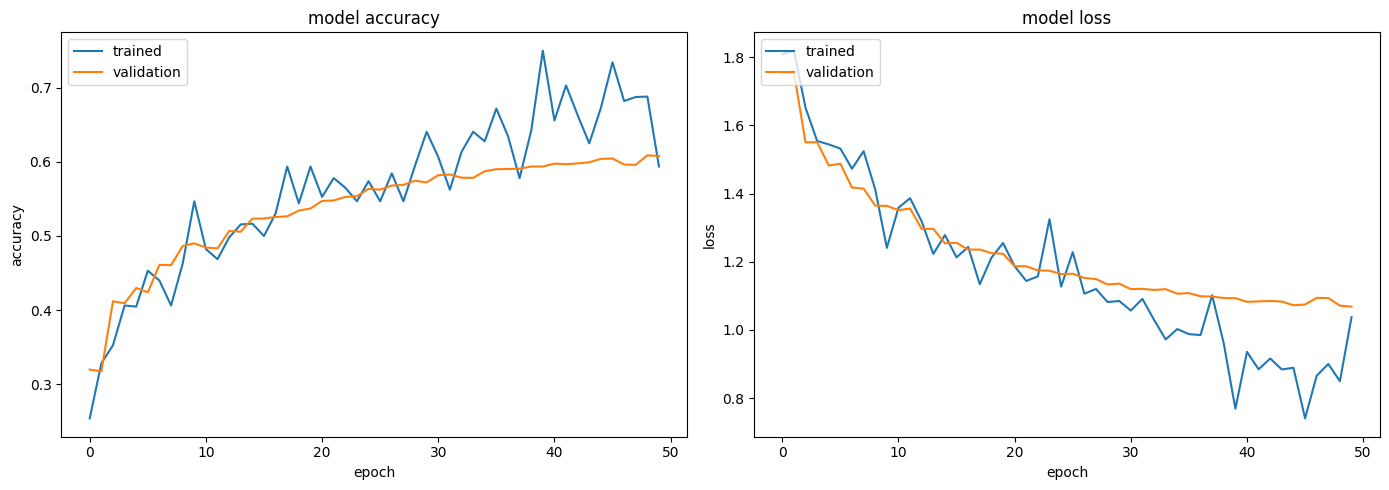

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['trained', 'validation' ], loc='upper left')

plt.subplot(1, 2, 2)
plt.title('model loss')
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['trained', 'validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('model-deteksi-ekspresi.h5')